In [2]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Activation,Dropout,Flatten,Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
# load dataset
(trainX, trainy), (testX, testy) = keras.datasets.fashion_mnist.load_data()

In [4]:
print('X_train Count:'+ str(trainX.shape[0]))
print('X_test Count:'+ str(testX.shape[0]))

X_train Count:60000
X_test Count:10000


In [5]:
#divide the train 70-30 between train and validation
X_train,X_val,Y_train,Y_val=train_test_split(trainX,trainy,random_state=42,test_size=0.3)

In [6]:
print('X_train Count:'+ str(X_train.shape[0]))
print('Train Label Count:'+str(Y_train.shape[0]))
print('-------------------------------------------------------')
print('X_Val Count:'+ str(X_val.shape[0]))
print('Validation Label Count:'+str(Y_val.shape[0]))
print('-------------------------------------------------------')
print('X_test Count:'+ str(testX.shape[0]))
print('Test Label Count:'+str(testy.shape[0]))

X_train Count:42000
Train Label Count:42000
-------------------------------------------------------
X_Val Count:18000
Validation Label Count:18000
-------------------------------------------------------
X_test Count:10000
Test Label Count:10000


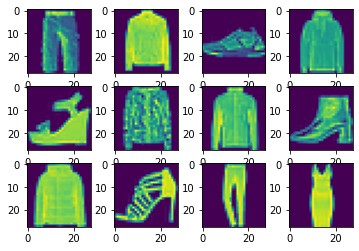

In [7]:
#visualize the images using matplotlib
f, axarr = plt.subplots(3,4)
for i in range(0,3):
  for j in range(0,4):
    #import random number between 0 and 42000
    r=random.randrange(0,42001,1)
    axarr[i,j].imshow(X_train[r])

In [8]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))

In [10]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
# normalize to range 0-1
X_train=X_train/255.0
X_val=X_val/255.0

In [54]:
model_1 = Sequential([
      #layer 1
      Conv2D(112,(4,4),padding='same',kernel_initializer='he_uniform',input_shape=(28,28,1)),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(48,(4,4),padding='same',kernel_initializer='he_uniform'),
      BatchNormalization(),
      Activation('relu'),  
      MaxPooling2D((2,2)),
      Dropout(0.3),


      #layer 2
      Conv2D(112,(4,4),padding='same',kernel_initializer='he_uniform'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(48,(4,4),padding='same',kernel_initializer='he_uniform'),
      BatchNormalization(),
      Activation('relu'),
      MaxPooling2D((2,2)),
      Dropout(0.3),


      Flatten(),
      #Fully Connected Layers
      Dense(224,kernel_initializer='he_uniform'),
      BatchNormalization(),
      Activation('relu'),
      Dropout(0.2),
      Dense(224,kernel_initializer='he_uniform'),
      BatchNormalization(),
      Activation('relu'),
      Dropout(0.2),
      #prediction layer
      Dense(10,activation='softmax')
])

model_1.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.0001),metrics=['accuracy'])

early_acc=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10,min_delta=0.01)

history=model_1.fit(
        X_train,Y_train,
        epochs=30,
        validation_data=(X_val,Y_val),
        callbacks=[early_acc],
        verbose=1)

Epoch 1/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.8142 - accuracy: 0.7118 - val_loss: 0.4310 - val_accuracy: 0.8409
Epoch 2/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4869 - accuracy: 0.8245 - val_loss: 0.3423 - val_accuracy: 0.8737
Epoch 3/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4056 - accuracy: 0.8543 - val_loss: 0.3123 - val_accuracy: 0.8837
Epoch 4/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3572 - accuracy: 0.8722 - val_loss: 0.3292 - val_accuracy: 0.8771
Epoch 5/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3270 - accuracy: 0.8827 - val_loss: 0.3109 - val_accuracy: 0.8841
Epoch 6/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3058 - accuracy: 0.8894 - val_loss: 0.2625 - val_accuracy: 0.9007
Epoch 7/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2863 - accuracy: 0.8954 - val_loss: 0.4160 - val_accuracy:

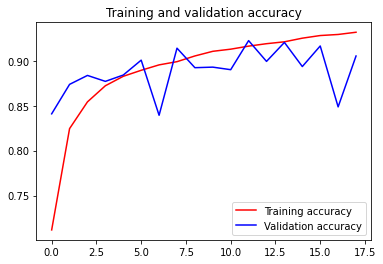

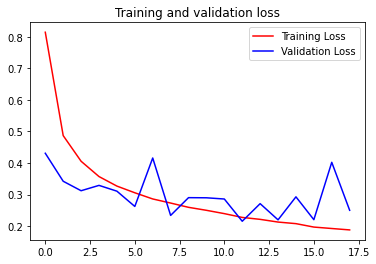

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()